In [55]:
# 패키지 설치

from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [15]:
# 붓꽃 데이터 불러오기

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 행은 다 갖고 오고 열은 petal length(2인덱스) 와 petal width(3인덱스)만 가져옴.
y = iris.target # 실제로 맞춰야 하는 값

print("클래스 레이블 : {0}".format(np.unique(y))) # 타겟값의 레이블을 중복없게 가져옴
# 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica 

클래스 레이블 : [0 1 2]


In [22]:
# 훈련 데이터(신경망 학습에 이용)와 테스트 데이터(학습 결과 검증에 이용)를 분리
# 70% 정도를 훈련, 30%는 테스트 데이터

# 테스트 사이즈를 30%로 설정하고 데이터 shuffle을 위한 시드값을 1로 설정, data의 비율은 유지
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)

print("y 전체 레이블의 개수 : {0}".format(np.bincount(y))) # y에서 0, 1, 2 의 빈도수
print("y 훈련 데이터의 레이블 개수 : {0}".format(np.bincount(y_train))) # 훈련 데이터에서 0, 1, 2 의 빈도수
print("y 테스트 데이터의 레이블 개수 : {0}".format(np.bincount(y_test))) # 테스트 데이터에서 0, 1, 2 의 빈도수

y 전체 레이블의 개수 : [50 50 50]
y 훈련 데이터의 레이블 개수 : [35 35 35]
y 테스트 데이터의 레이블 개수 : [15 15 15]


In [13]:
# 특성 표준화

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train) # 샘플 평균과 표준편차를 계산해서 훈련 세트를 표준화 => 성능 최적화
X_test_std = sc.transform(X_test) # 샘플 평균과 표준편차를 계산해서 테스트 세트를 표준화 => 성능 최적화

In [54]:
# 사이킷런으로 퍼셉트론 훈련하기

# max_iter는 반복문을 돌리는 최대 횟수, eta0은 학습률, tol은 반복문을 멈추기 위한 최소 오차율, random_state은 난수 생성
ppn = Perceptron(max_iter = 40, eta0 = 0.1, tol=1e-3, random_state=1) # tol에 해당하는 값이 되면 max_iter 되기 전에 멈춤(그 정도 오차면 정확하다고 판단하기 때문)
ppn.fit(X_train_std, y_train) # 훈련데이터로 퍼셉트론 훈련을 시킴

y_pred = ppn.predict(X_test_std) # x 테스트 표준홛 데이터로 y 예측값을 산출

print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum()) # 테스트 데이터와 예측값이 다른 경우는 잘못 분류된 경우
print('정확도: %.2f' % accuracy_score(y_test, y_pred)) # 실질적으로 테스트 데이터와 예측값이 어느 정도 일치하는지 비율로 나타냄
print('정확도: %.2f' % ppn.score(X_test_std, y_test)) # X_test_std로 y_pred를 계산해서 바로 정확도를 보여주는 함수(위보다 간단)

잘못 분류된 샘플 개수: 1
정확도: 0.98
정확도: 0.98


In [63]:
# 결정 경계 그래프 함수

def plot_descsion_regions(X, y, classifier, test_index = None, resolution= 0.02):
    
    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v') # 마커 설정
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # 색깔 설정
    cmap = ListedColormap(colors[:len(np.unique(y))]) # y 레이블 개수에 맞춰 색을 매핑
    
    # 결정 경계(+, -로 구분)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # petal length에 해당하는 최솟값과 최댓값
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # petal width에 해당하는 최솟값과 최댓값
    
    # 빈 그래프부분에 그리드 생성
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 0.2간격의 바둑판 모양으로 x, y축에 최솟값, 최댓값 범위로 생성
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # xx1과 xx2를 1차원 배열로 변경 후 계단 함수를 돌려서 1과 -1로 구분
    Z = Z.reshape(xx1.shape) # 그렇게 생성된 걸 다시 xx1의 차원 수에 맞춰서 다시 변경
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 색으로 구분된 등고선 맵 그리기
    plt.xlim(xx1.min(), xx1.max()) # x 축 설정
    plt.ylim(xx2.min(), xx2.max()) # y 축 설정
    
    # 산점도 그리기
    for index, column in enumerate(np.unique(y)):
        plt.scatter(x=X[y == column, 0], # X는 petal length와 width를 갖고 있음. 거기서 y(레이블 0, 1, 2의 )과 동일한 열의 데이터만 행으로 가져오고 열은 petal length를 가져옴 
                    y=X[y == column, 1], # y(레이블 0, 1, 2의 )과 동일한 열의 데이터만 행으로 가져오고 열은 petal width를 가져옴 
                    alpha=0.8, # 점 크기
                    c=colors[index],
                    marker=markers[index], 
                    label=column, 
                    edgecolor='black')
        
    # 테스트 샘플을 부각하여 그립니다.
    if test_index: # 특정 인덱스일 경우엔 테스트 데이터를 추출해서 점의 크기나 미적으로 변화시켜 그려줌
        X_test, y_test = X[test_index, :], y[test_index]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')



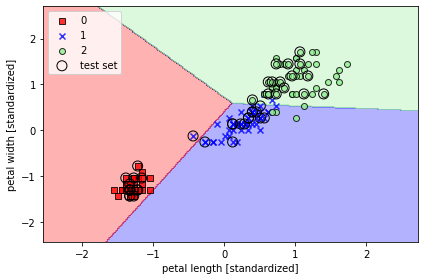

In [64]:
# 표준화된 훈련데이터를 사용하여 퍼셉트론 훈련

X_combined_std = np.vstack((X_train_std, X_test_std)) # X_train_std 데이터 아래에 X_test_std 데이터를 붙임.
y_combined = np.hstack((y_train, y_test)) # y_train 데이터 우측에 y_test 데이터를 붙임

# 아래에 붙인 샘플 데이터를 부각하여 그려줌.
plot_descsion_regions(X = X_combined_std, y = y_combined, classifier=ppn, test_index=range(105, 150)) 

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


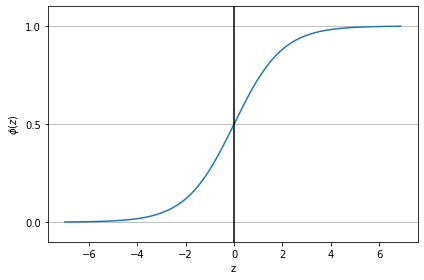

In [66]:
# 로지스틱 회귀를 이용한 클래스 확률 모델링


# -7과 7의 x범위로 시그모이드 함수 그려보기

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z)) # 시그모이드 수식을 코드로 표현

z = np.arange(-7, 7, 0.1) # -7부터 7까지 0.1의 간격으로 리스팅
phi_z = sigmoid(z) # 시그모이드 함수로 반환되는 1이나 0의 값을 변수에 대입

plt.plot(z, phi_z) 
plt.axvline(0.0, color="k") # 수직 축
plt.ylim(-0.1, 1.1) # y축의 범위
plt.xlabel('z') 
plt.ylabel('$\phi (z)$')

# y축의 눈금과 격자 설정
plt.yticks([0.0, 0.5, 1.0]) # 격자선을 넣을 구간
ax = plt.gca()
ax.yaxis.grid(True) # 그리드 설정

plt.tight_layout()
plt.show()

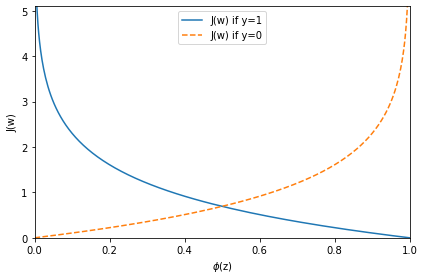

In [67]:
# 로지스틱 비용 함수의 가중치 비용 학습하기


# 로지스틱 회귀에서 odds란 ? A가 발생할 확률(P(A)) / A가 발생하지 않을 확률(1-P(A)) 
def cost_1(z):
    return - np.log(sigmoid(z)) # 가능도가 매우 작을 때 일어나는 수치상의 언더플로를 미연에 방지하기 위해 로그를 씌움,
# 시그모이드 함수 반환 값에 음 로그를 씌움.

def cost_0(z): # 비용함수 = 오차를 계산하는 함수
    return - np.log(1- sigmoid(z)) # 

z = np.arange(-10, 10, 0.1) # -10부터 10 범주로 0.1 간격의 값 리스팅
phi_z = sigmoid(z) # 위 리스트 값들을 시그모이드함수를 돌려서 반환

c1 = [cost_1(x) for x in z] # 시그모이드 함수를 돌린 값들을 비용함수_1에 돌려서 그 값을 리스트에 추가
plt.plot(phi_z, c1, label='J(w) if y=1') # 비용함수로 반환된 값을 그려줌.

c0 = [cost_0(x) for x in z] # 시그모이드 함수를 돌린 값들을 비용함수_0에 돌려서 그 값을 리스트에 추가
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0') # 비용함수로 반환된 값을 그려줌.

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# y = 0을 보면 x가 증가할 수록 y의 값이 무한대로 증가하는 걸 볼 수 있는데 이는 cost인 비용이 무한대로 늘어나는 함수이다.
# 위 함수는 오차가 매우 많으므로 일단 버리고 y=1 때의 함수처럼 비용이 최소화되는 함수를 선택해야하는 결론이 나온다.